In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt


## 스케일링으로 해보기

In [25]:
# 데이터 로딩
dataDict=load_diabetes(scaled=False)
dataDict.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [26]:
diabetesDF2 = pd.DataFrame(dataDict['data'], columns=dataDict['feature_names'])
diabetesDF2

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [27]:
diabetesDF2['target'] = dataDict['target']

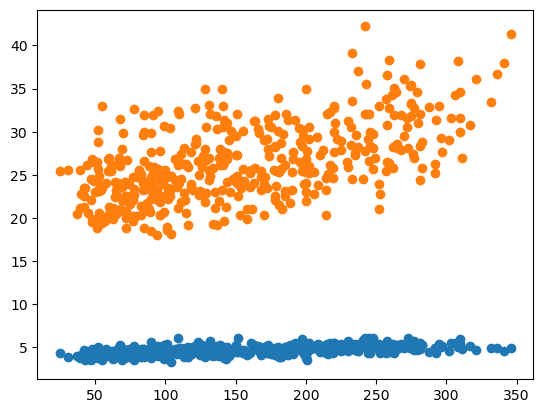

In [28]:
plt.scatter(diabetesDF2['target'], diabetesDF2['s5'])
plt.scatter(diabetesDF2['target'], diabetesDF2['bmi'])
plt.show()

In [29]:
features=diabetesDF2[['s5','bmi']]
target=diabetesDF2['target']

print(f'features : {features.shape}, {features.ndim}D')
print(f'target : {target.shape}, {target.ndim}D')

features : (442, 2), 2D
target : (442,), 1D


In [30]:
## 데이터셋 준비
from sklearn.model_selection import train_test_split

In [31]:
# train:test = 80:20 ==> test_size = 0.2 또는 train_size = 0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율 고려
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [32]:
# train:test = 80:20 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (353, 2), 2D
y_train : (353,), 1D
X_test : (89, 2), 2D
y_test : (89,), 1D


[2-3] 피쳐 스케일링

In [33]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [34]:
# robustcaler적용
robust_scaler= RobustScaler()
data_train_robust_scaled = robust_scaler.fit_transform(X_train)

In [35]:
data_test_robust_scaled = robust_scaler.fit_transform(X_test)

In [36]:
# 스케일러 인스턴스 생성
mmScaler=MinMaxScaler(feature_range=(-1,1))

In [37]:
# MinMaxScaler에 데이터셋 전용에 속성값 설정
mmScaler.fit(data_train_robust_scaled)

MinMaxScaler(feature_range=(-1, 1))

In [38]:
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_

(array([-0.04040156, -0.3553719 ]),
 array([-1.87967547, -1.27868852]),
 array([0.51051283, 0.50413223]),
 array([2.0379538 , 2.68852459]))

In [39]:
# 학습용, 테스트용 데이터셋 스케일링 진행
# 학습용 데이터 ==> 스케일링 ==> ndarray 타입 반환
X_train_scaled=mmScaler.transform(data_train_robust_scaled)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()


((353, 2), -1.0, 1.0)

In [40]:
# 테스트용 데이터 ==> 스케일링  ==> ndarray 타입 반환
X_test_scaled= mmScaler.transform(data_test_robust_scaled)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((89, 2), -0.8362364907819451, 0.8193077014067959)

[3] 학습 진행

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
model = KNeighborsRegressor()

In [43]:
model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [44]:
# 모델 파라미터 => 학습 후 즉, fit() 실행 후 설정되는 매개변수
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(2, 353, 'euclidean', {})

In [45]:
scores ={}
for k in range(1, model.n_samples_fit_+1 ):
    # 최근접 이웃의 갯수 설정 <== 모델 성능 좌우 : 하이퍼파라미터
    model.n_neighbors=k

    # 성능 평가
    score = model.score(X_test_scaled, y_test)
    
    scores[k]=score

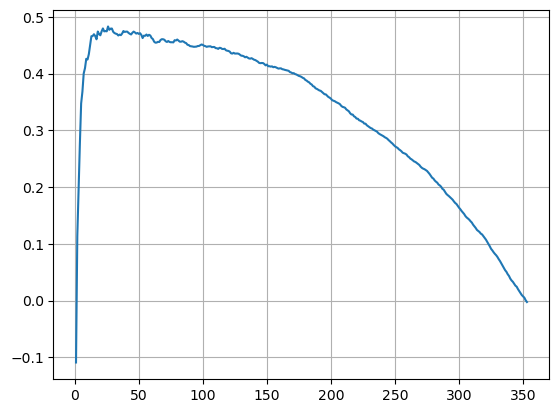

In [46]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.grid()
plt.show()

In [47]:
best_k = sorted(scores.items(), key=lambda x: x[1], reverse=True)[0][0]
best_k

26

In [48]:
# 모델에 적용 => n_neighbors에 설정
model.n_neighbors=best_k

## 점수확인 및 테스트스케일로 예측

In [49]:
model.score(X_test_scaled, y_test)

0.48306263668134664

In [50]:
model.predict(X_test_scaled)

array([143.92307692, 219.76923077, 203.42307692,  96.19230769,
       182.46153846, 130.34615385, 111.80769231, 262.69230769,
       118.26923077, 111.46153846, 113.84615385, 219.26923077,
       164.15384615, 103.65384615,  94.38461538, 230.15384615,
       153.        , 114.76923077, 169.80769231,  83.        ,
       183.        , 242.15384615,  97.03846154, 209.61538462,
        86.76923077, 145.42307692, 186.11538462, 144.30769231,
       213.73076923, 127.69230769, 240.15384615, 170.23076923,
        88.65384615, 144.15384615, 212.03846154, 187.23076923,
        90.65384615, 154.26923077, 262.69230769, 177.07692308,
       184.42307692, 178.38461538, 240.42307692, 159.69230769,
        81.88461538,  96.15384615,  98.42307692, 109.30769231,
       240.15384615, 106.42307692, 161.11538462, 125.96153846,
       113.07692308, 244.92307692, 230.57692308, 100.92307692,
       111.53846154, 152.61538462, 221.30769231, 130.26923077,
       182.76923077, 119.53846154, 110.42307692,  85.42